<a href="https://colab.research.google.com/github/ogut77/DataScience/blob/main/Arima1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
od1=pd.read_csv('https://raw.githubusercontent.com/ogut77/DataScience/main/data/od31.csv')
od1

,Demand
0,22.46
1,20.27
2,20.97
3,23.68
4,23.25
5,23.48
6,24.81
7,25.44
8,24.88
9,27.38


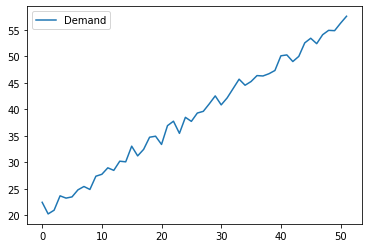

In [3]:
od1.plot()

In [5]:
#testing for Stationary
from statsmodels.tsa.stattools import adfuller
result = adfuller(od1['Demand'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -0.352327
p-value: 0.917759
Critical Values:
	1%: -3.585
	5%: -2.928
	10%: -2.602


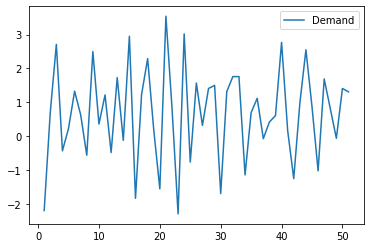

In [6]:
dod1 = od1 - od1.shift(1)
dod1.plot()

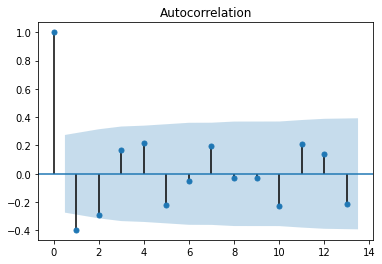

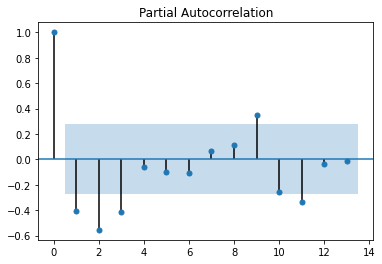

In [9]:
from statsmodels.graphics import tsaplots
import matplotlib.pyplot as plt
dod1=dod1.dropna()
fig = tsaplots.plot_acf(dod1, lags=13)
plt.show()
fig = tsaplots.plot_pacf(dod1, lags=13)
plt.show()


In [20]:

from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(od1['Demand'],order=(3,1,1))
model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D.Demand   No. Observations:                   51
Model:                 ARIMA(3, 1, 1)   Log Likelihood                 -63.454
Method:                       css-mle   S.D. of innovations              0.816
Date:                Tue, 03 May 2022   AIC                            138.908
Time:                        21:10:16   BIC                            150.498
Sample:                             1   HQIC                           143.337
                                                                              
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.7115      0.013     56.024      0.000       0.687       0.736
ar.L1.D.Demand    -0.4751      0.199     -2.388      0.021      -0.865      -0.085
ar.L2.D.Demand    -0.5843      0.175     -3.339      0.002      -0.927      -0.241
ar.L3.D.Demand    -0.1559      0.188     -0.830      0.411      -0.524       0.212
ma.L1.D.Demand    -0.7771      0.163     -4.776      0.000      -1.096      -0.458
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.1708           -1.3616j            1.3723           -0.2699
AR.2           -0.1708           +1.3616j            1.3723            0.2699
AR.3           -3.4053           -0.0000j            3.4053           -0.5000
MA.1            1.2868           +0.0000j            1.2868            0.0000
-----------------------------------------------------------------------------
"""

In [24]:

from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(od1['Demand'],order=(0,1,1))
model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D.Demand   No. Observations:                   51
Model:                 ARIMA(0, 1, 1)   Log Likelihood                 -69.698
Method:                       css-mle   S.D. of innovations              0.913
Date:                Tue, 03 May 2022   AIC                            145.396
Time:                        21:11:25   BIC                            151.191
Sample:                             1   HQIC                           147.610
                                                                              
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.7085      0.008     83.988      0.000       0.692       0.725
ma.L1.D.Demand    -1.0000      0.054    -18.529      0.000      -1.106      -0.894
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


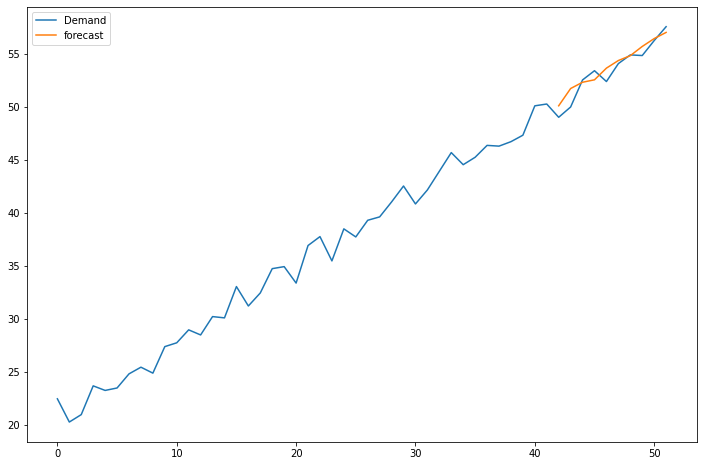

In [23]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(od1['Demand'],order=(3, 1, 1))
results=model.fit()
od1['forecast']=results.predict(start=42,end=51,dynamic=True)
od1[['Demand','forecast']].plot(figsize=(12,8))